# Testing File Read/Write Speed

_created by Austin Poor_

I wanted to experiment with how long it takes to read & write files of different sizes in Python.

How big is the ideal size for a single file for optimized read/write times?

In [ ]:
from pathlib import Path
from itertools import chain
from speed_test import grid_run

In [2]:
# Set configs
TMP_FILE = Path("tmp.file") # Temporary file to write data
N_BYTES = list(chain(*(
    [10**i,10**i*5] for i in range(0,10)
))) # File size to read/write
N_REPEATS = 50 # How many times to repeat each run & avg

# Create temp file
TMP_FILE.touch()

In [3]:
# Run test
data = grid_run(
    TMP_FILE,
    N_BYTES,
    N_REPEATS
)

  5.0 GB: 100%|█████████████████████████████████| 50/50 [06:22<00:00,  7.65s/it]


In [4]:
# Clean up tmp file
TMP_FILE.unlink()

---

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
df = pd.DataFrame(data)
df

,n-bytes,write-ns,read-ns
0,1,395000,396431
1,1,222978,137913
2,1,162172,137602
3,1,294455,122417
4,1,231881,164891
...,...,...,...
995,5000000000,4545899278,2861046144
996,5000000000,4417753134,2869262381
997,5000000000,4763416764,2739879930
998,5000000000,4464652994,2675730445


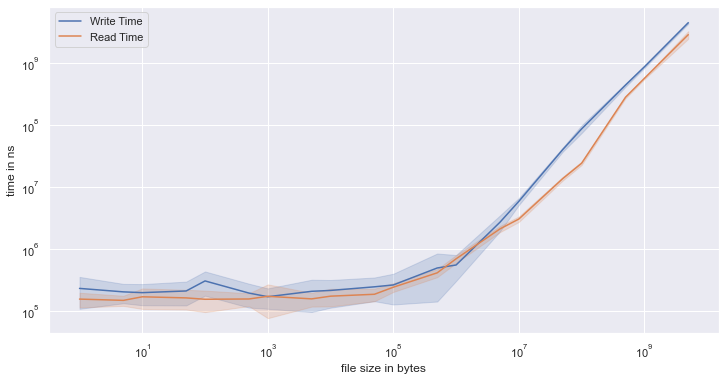

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot("n-bytes","write-ns",data=df,label="Write Time",ci="sd")
sns.lineplot("n-bytes","read-ns",data=df,label="Read Time",ci="sd")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("file size in bytes")
plt.ylabel("time in ns");

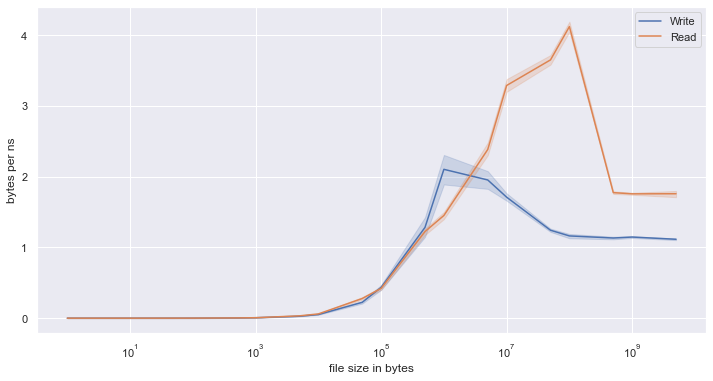

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(df["n-bytes"],df["n-bytes"] / df["write-ns"],label="Write")
sns.lineplot(df["n-bytes"],df["n-bytes"] / df["read-ns"],label="Read")
plt.xscale("log")
plt.xlabel("file size in bytes")
plt.ylabel("bytes per ns");